<a href="https://colab.research.google.com/github/psmniranjana/Arduino-coding-1/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od
from opendatasets import datasets

In [ ]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maleeshaniranjana
Your Kaggle Key: ··········


100%|██████████| 7.63k/7.63k [00:00<00:00, 5.13MB/s]

In [ ]:
data = pd.read_csv("/content/random-linear-regression/test.csv")

In [ ]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


from matplotlib import pyplot as plt
_df_0['x'].plot(kind='hist', bins=20, title='x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['y'].plot(kind='hist', bins=20, title='y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='x', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['x'].plot(kind='line', figsize=(8, 4), title='x')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['y'].plot(kind='line', figsize=(8, 4), title='y')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data.shape

(300, 2)

In [ ]:
x= data['x']
y= data['y']

In [ ]:
y

0      79.775152
1      23.177279
2      25.609262
3      17.857388
4      41.849864
         ...    
295    68.545888
296    47.334876
297    54.090637
298    63.297171
299    52.459467
Name: y, Length: 300, dtype: float64

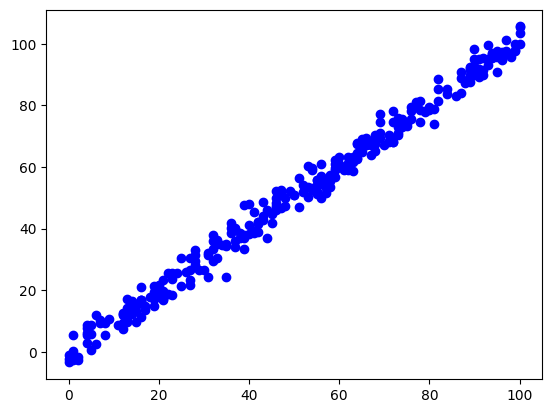

In [ ]:
plt.scatter(x,y,c='b')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((240,), (60,))

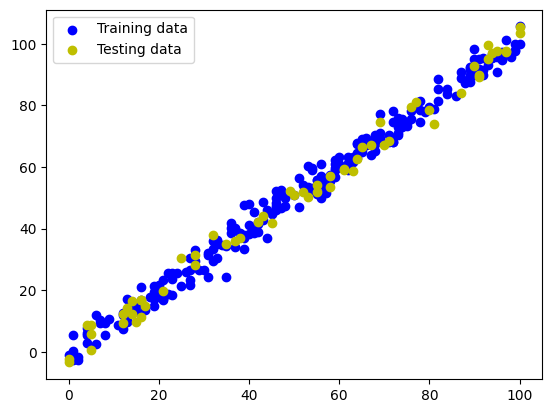

In [ ]:
plt.scatter(x_train, y_train, c='b', label='Training data')
plt.scatter(x_test, y_test, c='y', label='Testing data')
plt.legend()
plt.show()

# Model Building

In [ ]:
#create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr= 0.05),
              metrics = ['mae'])

#train model

epoch_number = 10
history = model.fit(tf.expand_dims(x_train, axis=1),y_train, epochs = epoch_number)

Epoch 1/10
8/8 [==============================] - 1s 2ms/step - loss: 45.6701 - mae: 45.6701
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 18.4247 - mae: 18.4247
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 6.7713 - mae: 6.7713
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 6.3710 - mae: 6.3710
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 3.7232 - mae: 3.7232
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 2.8470 - mae: 2.8470
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 2.6428 - mae: 2.6428
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 2.4621 - mae: 2.4621
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 2.4183 - mae: 2.4183
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 2.3904 - mae: 2.3904


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                128       
                                                                 
 dense_12 (Dense)            (None, 10)                650       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 789 (3.08 KB)
Trainable params: 789 (3.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_predictions =model.predict(x_test)
y_predictions[:5]

2/2 [==============================] - 0s 5ms/step


array([[93.14384 ],
       [78.72842 ],
       [97.26251 ],
       [ 5.621766],
       [94.17349 ]], dtype=float32)

In [ ]:
y_test.head(5)

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

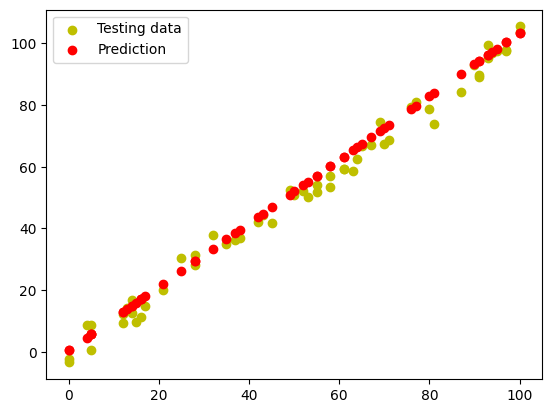

In [ ]:

plt.scatter(x_test, y_test, c='y', label='Testing data')
plt.scatter(x_test, y_predictions, c='r', label='Prediction')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 2.9739 - mae: 2.9739


[2.9738643169403076, 2.9738643169403076]

In [ ]:
history.history

{'loss': [45.67011642456055,
  18.424739837646484,
  6.771294116973877,
  6.371010780334473,
  3.7232086658477783,
  2.847012758255005,
  2.6427574157714844,
  2.4621312618255615,
  2.4182510375976562,
  2.3903660774230957],
 'mae': [45.67011642456055,
  18.424739837646484,
  6.771294116973877,
  6.371010780334473,
  3.7232086658477783,
  2.847012758255005,
  2.6427574157714844,
  2.4621312618255615,
  2.4182510375976562,
  2.3903660774230957]}

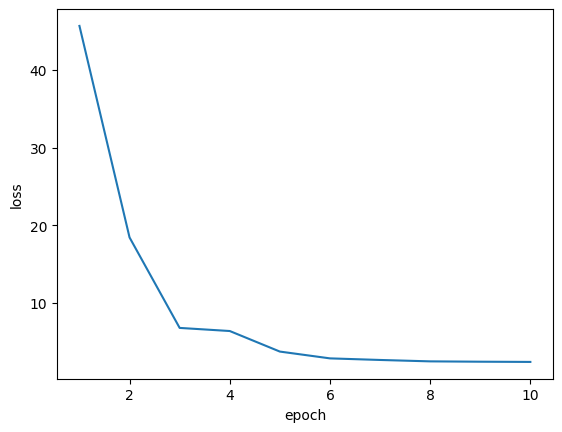

In [ ]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
for layer in model.layers:
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]
  print(f"\nWeights:\n {weights} \nBiases:\n {biases}")


Weights:
 [[ 0.13965142  0.04233509  0.16517313 -0.05081678  0.31243914  0.20309614
   0.07508636  0.0270092   0.2050357  -0.00984547  0.0031311   0.06892385
   0.2160314  -0.25998303  0.05512761  0.23075719 -0.02001151  0.22420736
   0.24043265 -0.17931226  0.07489493  0.26256397  0.15174182 -0.02355884
   0.03242402  0.05683071 -0.25578535  0.3066994   0.21352214 -0.02610838
   0.0393943  -0.13587458  0.22679754 -0.12969114  0.2809549   0.10636704
  -0.18867667 -0.1615616   0.2669224  -0.2322194  -0.24774894  0.04644922
  -0.17577583  0.10745764  0.21192287 -0.1450647   0.16700885 -0.03194066
   0.01188669 -0.2772988   0.29294696  0.17951629 -0.0863791  -0.16679703
  -0.1126337  -0.26236573 -0.26215747 -0.22963434  0.03608184  0.23277465
  -0.26694468 -0.02745313  0.01437159  0.30862677]] 
Biases:
 [-0.01693288  0.01256969 -0.02536359  0.01634873  0.01387147 -0.01777869
 -0.02287179 -0.01551422  0.00971123 -0.01398025 -0.01640611 -0.0168721
  0.00889401 -0.00464626 -0.02406937 -0.01